# Tareas



##### Profesor: Para el ejercicio 2 de la tarea me apoyé de la fac menor de mate y de mis compañeros a través de nuestrp grupo de whatsapp

<div class="alert alert-warning">
Fecha límite de entrega: 9 de octubre, 2020 23:59
</div>

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

In [1]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)

from sympy import Symbol
from sympy import *
import sympy as sym

In [2]:
x = IndexedBase('x')
b = IndexedBase('beta')
i = symbols('i')
j = Symbol('j')
n = Symbol('n')
Yo = IndexedBase('y')
xo = Symbol('x_1')
xy=Symbol('XxY')

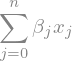

In [3]:
yg = summation(b[j]*x[j],[j,0,n])
yg

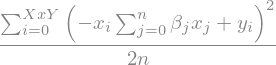

In [4]:
j = (1/(2*n))*summation((Yo[i]-(yg*x[i]))**2,[i,0,xy])

j

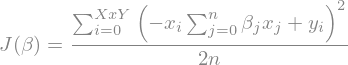

In [5]:
J = Function('J')
bv = Symbol('beta')

J1=Eq(J(bv),j)
J1

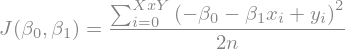

In [6]:
b0 = Symbol('beta_0')
b1 = Symbol('beta_1')

j3 = (1/(2*n))*summation((Yo[i]-b0-(b1*x[i]))**2,[i,0,xy])

J2 = Eq(J(b0,b1),j3)
J2

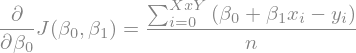

In [7]:
Eq(diff(J(b0,b1),b0),simplify(diff(j3,b0)))

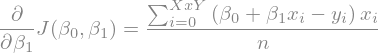

In [8]:
Eq(diff(J(b0,b1),b1),simplify(diff(j3,b1)))

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

In [9]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, widgets

from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['cbrt', 'seterr', 'take', 'nan', 'power', 'lcm', 'sqrt', 'solve', 'ones', 'product', 'gcd', 'plot', 'Line2D', 'tanh', 'interactive', 'vectorize', 'source', 'array', 'minimum', 'var', 'pi', 'diff', 'exp', 'transpose', 'det', 'invert', 'gamma', 'poly', 'prod', 'deprecated', 'log', 'trunc', 'Number', 'eye', 'binomial', 'floor', 'plotting', 're', 'beta', 'Circle', 'reshape', 'tan', 'zeros', 'fft', 'sinc', 'maximum', 'conjugate', 'diag', 'sign', 'partition', 'cos', 'cosh', 'Polygon', 'mod', 'multinomial', 'roots', 'trace', 'sin', 'add', 'test', 'ifft', 'flatten', 'sinh']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 


In [52]:
class RegresionLineal:
    def __init__(self, alpha=0.3, max_iters=100, tols=0.001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m    

In [53]:
X = np.loadtxt('data/edad.dat')
Y = np.loadtxt('data/altura.dat')

In [142]:
def CostoF(b0, b1):
    costo = 0
    for i in range(len(X)):
        costo+= (Y[i]-b0-b1*X[i])**2/(2*len(X))
    return costo


b0 = np.arange(-2, 3, 0.01)
b1 = np.arange(-2, 2, 0.01)
B0, B1 = np.meshgrid(b0, b1)
C = CostoF(B0,B1)

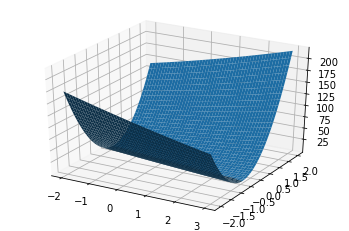

In [143]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection = '3d')
ax.plot_surface(B0,B1, C)

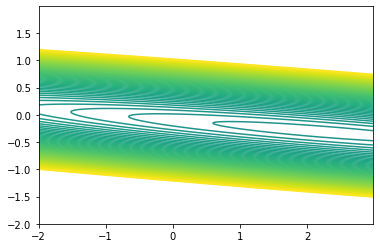

In [146]:
fig = plt.figure()
plt.contour(B0,B1,C, levels= np.arange(-50,50,.8))

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

In [148]:
r = RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
r.gradientDescent(X, Y)

La función convergió con beta: [ 2.27548901 -0.31459673] en la iteración 5755


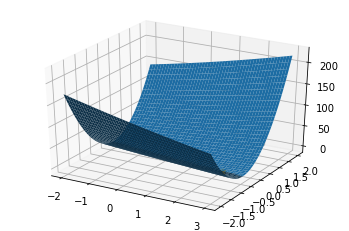

In [153]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection = '3d')
ax.plot_surface(B0,B1, C)

C1 = CostoF(2.27548901,-0.31459673)

ax.scatter(2.27548901,-0.31459673,C1, color = "orange")

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.



**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [47]:
%cat data/chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

In [111]:
def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

La función convergió con beta: [22.26350136  3.44531603] en la iteración 123659


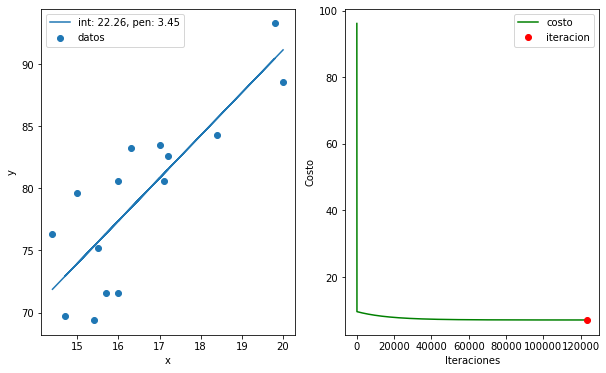

In [112]:
X = np.loadtxt('data/chirps.txt', usecols=[0])
Y = np.loadtxt('data/chirps.txt', usecols=[1])

r = RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
r.gradientDescent(X, Y)

ultima_iteracion = (r.breaking_iteration - 1) if r.breaking_iteration else (r.max_iters - 1)

plotModelo(X,Y, r,ultima_iteracion)


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [113]:
%cat data/cuarteto.txt

10.0	8.04	10.0	9.14	10.0	7.46	8.0	6.58
8.0	6.95	8.0	8.14	8.0	6.77	8.0	5.76
13.0	7.58	13.0	8.74	13.0	12.74	8.0	7.71
9.0	8.81	9.0	8.77	9.0	7.11	8.0	8.84
11.0	8.33	11.0	9.26	11.0	7.81	8.0	8.47
14.0	9.96	14.0	8.10	14.0	8.84	8.0	7.04
6.0	7.24	6.0	6.13	6.0	6.08	8.0	5.25
4.0	4.26	4.0	3.10	4.0	5.39	19.0	12.50
12.0	10.84	12.0	9.13	12.0	8.15	8.0	5.56
7.0	4.82	7.0	7.26	7.0	6.42	8.0	7.91
5.0	5.68	5.0	4.74	5.0	5.73	8.0	6.89

La función convergió con beta: [2.94731748 0.50531651] en la iteración 12292


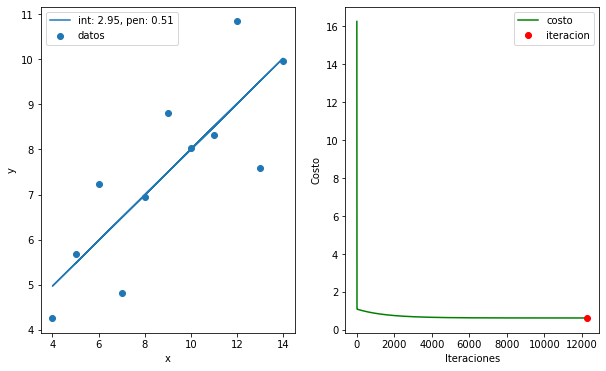

In [114]:
X = np.loadtxt('data/cuarteto.txt', usecols=[0])
Y = np.loadtxt('data/cuarteto.txt', usecols=[1])

r = RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
r.gradientDescent(X, Y)

ultima_iteracion = (r.breaking_iteration - 1) if r.breaking_iteration else (r.max_iters - 1)

plotModelo(X,Y, r,ultima_iteracion)

La función convergió con beta: [2.9481381  0.50522536] en la iteración 12293


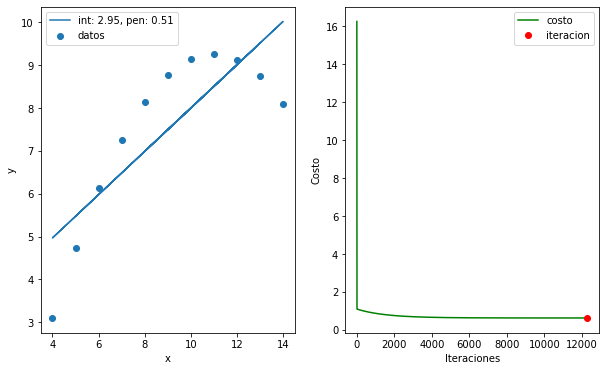

In [115]:
X = np.loadtxt('data/cuarteto.txt', usecols=[2])
Y = np.loadtxt('data/cuarteto.txt', usecols=[3])

r = RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
r.gradientDescent(X, Y)

ultima_iteracion = (r.breaking_iteration - 1) if r.breaking_iteration else (r.max_iters - 1)

plotModelo(X,Y, r,ultima_iteracion)

La función convergió con beta: [2.94967268 0.50495371] en la iteración 12294


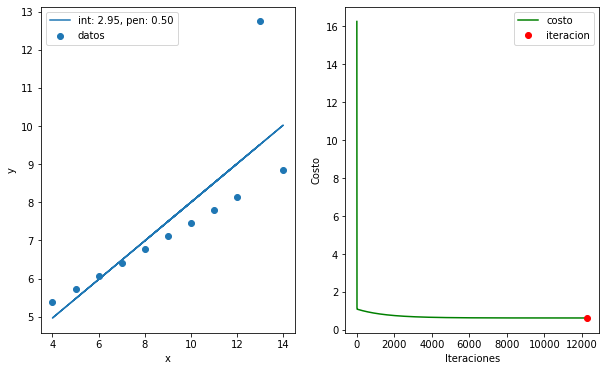

In [116]:
X = np.loadtxt('data/cuarteto.txt', usecols=[4])
Y = np.loadtxt('data/cuarteto.txt', usecols=[5])

r = RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
r.gradientDescent(X, Y)

ultima_iteracion = (r.breaking_iteration - 1) if r.breaking_iteration else (r.max_iters - 1)

plotModelo(X,Y, r,ultima_iteracion)

La función convergió con beta: [2.94895873 0.50513421] en la iteración 12294


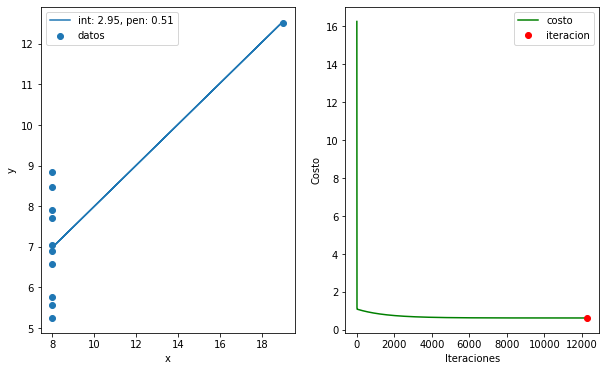

In [117]:
X = np.loadtxt('data/cuarteto.txt', usecols=[6])
Y = np.loadtxt('data/cuarteto.txt', usecols=[7])

r = RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
r.gradientDescent(X, Y)

ultima_iteracion = (r.breaking_iteration - 1) if r.breaking_iteration else (r.max_iters - 1)

plotModelo(X,Y, r,ultima_iteracion)

## Problema 5

Use el archivo `radioactive_decay.dat`

In [118]:
%cat data/radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

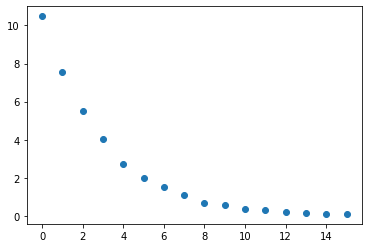

In [119]:
X = np.loadtxt('data/radioactive_decay.txt', usecols=[0])
Y = np.loadtxt('data/radioactive_decay.txt', usecols=[1])

plt.scatter(X,Y)


#Tienen forma de una exponencial negativa

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

In [120]:
#Podemos aplicar el logaritmo natural sobre el eje y para tratar de linealizar de forma que nos quedará algo similar a -x
import numpy as np

Yli = list(Y)
Y2 = []
n = 0

for i in Yli:
    n = np.log(i)
    Y2.append(n)
    n = 0
    
YL = np.array(Y2)
print(YL)

[ 2.34946868  2.02022218  1.70292826  1.3912819   1.00795792  0.70309751
  0.40546511  0.0861777  -0.38566248 -0.56211892 -0.99425227 -1.17118298
 -1.66073121 -1.89711998 -2.04022083 -2.20727491]


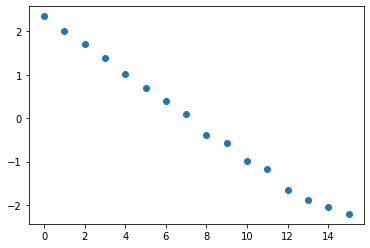

In [121]:
plt.scatter(X,YL)

# Sí quedaron más lineales :)

In [122]:
Xl = list(X)

ar = open('data/transform_radioactive_decay.txt', 'w+')
for i in range(len(Xl)):
    ar.write(str(Xl[i])+"\t"+str(Y2[i])+"\n")
ar.close()

In [123]:
%cat data/transform_radioactive_decay.txt

0.0	2.349468678892896
1.0	2.020222182019865
2.0	1.7029282555214393
3.0	1.3912819026309295
4.0	1.007957920399979
5.0	0.7030975114131134
6.0	0.4054651081081644
7.0	0.08617769624105241
8.0	-0.3856624808119846
9.0	-0.5621189181535413
10.0	-0.9942522733438669
11.0	-1.171182981502945
12.0	-1.6607312068216509
13.0	-1.8971199848858813
14.0	-2.0402208285265546
15.0	-2.2072749131897207


**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

La función convergió con beta: [ 2.27548901 -0.31459673] en la iteración 5755


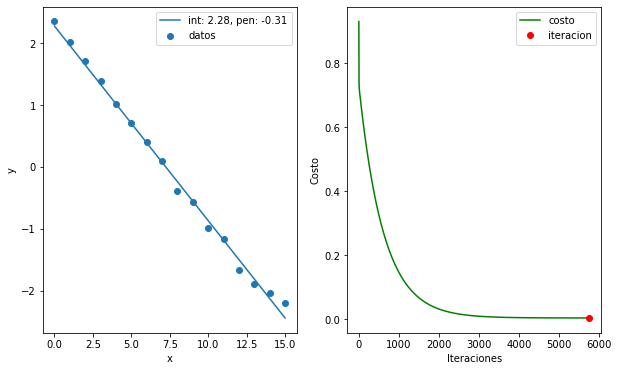

In [124]:
X = np.loadtxt('data/transform_radioactive_decay.txt', usecols=[0])
Y = np.loadtxt('data/transform_radioactive_decay.txt', usecols=[1])

r = RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
r.gradientDescent(X, Y)

ultima_iteracion = (r.breaking_iteration - 1) if r.breaking_iteration else (r.max_iters - 1)

plotModelo(X,Y, r,ultima_iteracion)

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.